KeyboardInterrupt: 

**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

Introduction

●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


.
**Descriptive Analytics for Numerical Columns**

●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

●	Steps:
	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

	Identify numerical columns in the dataset.
	Calculate the mean, median, mode, and standard deviation for these columns.

	Provide a brief interpretation of these statistics.


In [ ]:
import pandas as pd

# Load the dataset
file_path = "sales_data_with_discounts.csv"  # Ensure the correct path
df = pd.read_csv(file_path)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Compute statistical measures
statistics = {
    "Mean": numerical_cols.mean(),
    "Median": numerical_cols.median(),
    "Mode": numerical_cols.mode().iloc[0],  # Mode might have multiple values, take the first one
    "Standard Deviation": numerical_cols.std()
}

# Convert to DataFrame for better visualization
stats_df = pd.DataFrame(statistics)

# Display the statistics
print("Basic Statistical Measures for sales_data_with_discounts:")
print(stats_df)


Basic Statistical Measures for sales_data_with_discounts:
                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


## **Data Visualization\\**

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

●	**Histograms:**

	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

●	**Boxplots:**

	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.

●	**Bar Chart Analysis for Categorical Column:**

	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.
	Analyze the distribution of categories and provide insights.


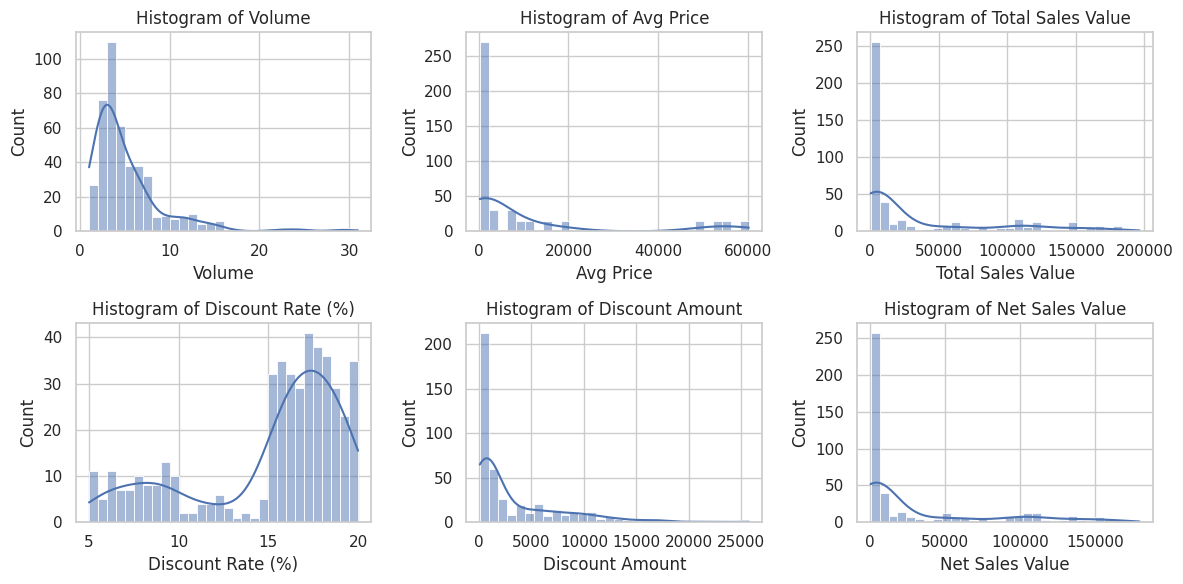

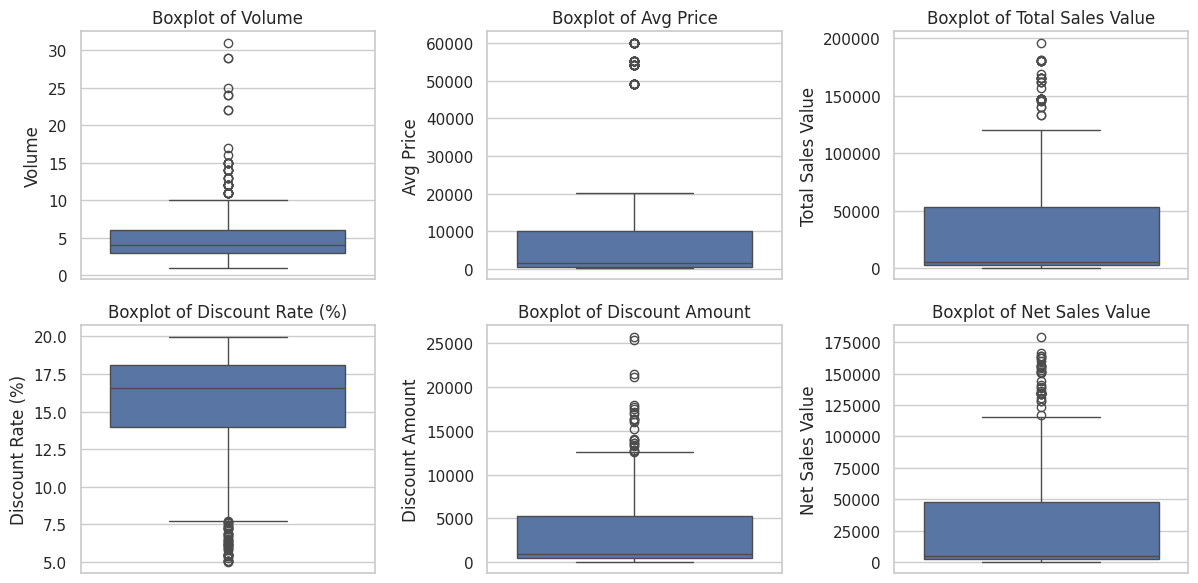

<ipython-input-4-adc312052380>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-4-adc312052380>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-4-adc312052380>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-4-adc312052380>:38: FutureWarning: 

Passing `palette` without assigning `hue` is dep

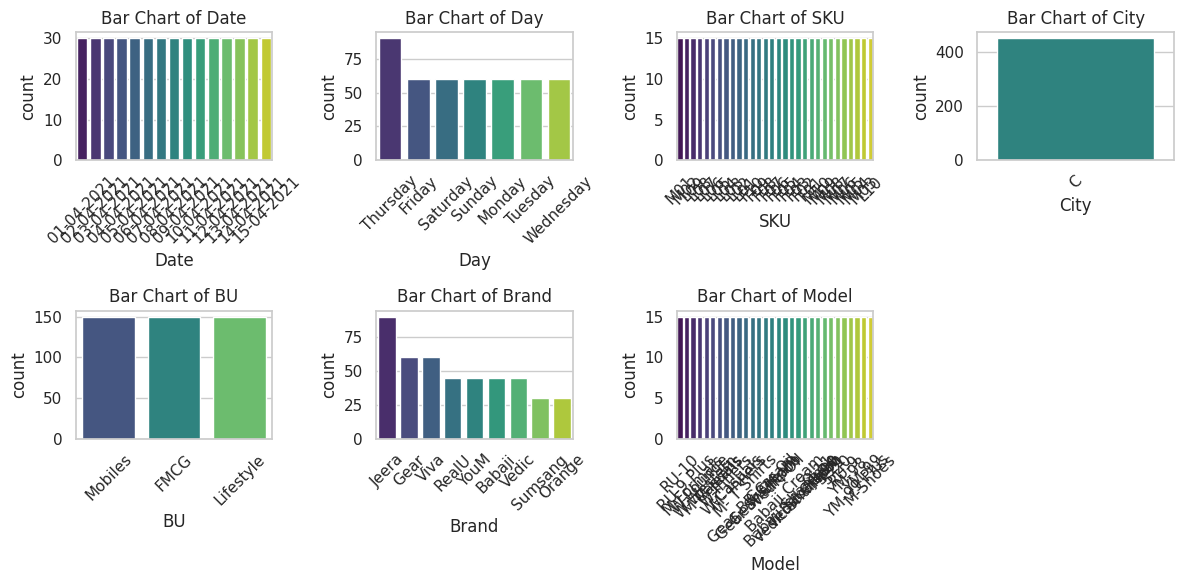

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sales_data_with_discounts.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set style for plots
sns.set(style="whitegrid")

###  Histograms: Visualizing Numerical Data Distribution ###
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

###  Boxplots: Identifying Outliers ###
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### 🏷 Bar Chart Analysis for Categorical Columns ###
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, (len(categorical_cols) + 1) // 2, i + 1)
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Bar Chart of {col}")
plt.tight_layout()
plt.show()


## **Standardization of Numerical Variables**

●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

●	Steps:
	Explain the concept of standardization (z-score normalization).
	Standardize the numerical columns using the formula: z=x-mu/sigma
  

	Show before and after comparisons of the data distributions.


Comparison of Before and After Standardization:
                    Mean Before    Std Before    Mean After  Std After
Volume                 5.066667      4.231602  6.118562e-17   1.001113
Avg Price          10453.433333  18079.904840  3.157968e-17   1.001113
Total Sales Value  33812.835556  50535.074173  1.578984e-17   1.001113
Discount Rate (%)     15.155242      4.220602 -3.552714e-17   1.001113
Discount Amount     3346.499424   4509.902963 -5.526444e-17   1.001113
Net Sales Value    30466.336131  46358.656624  1.973730e-17   1.001113


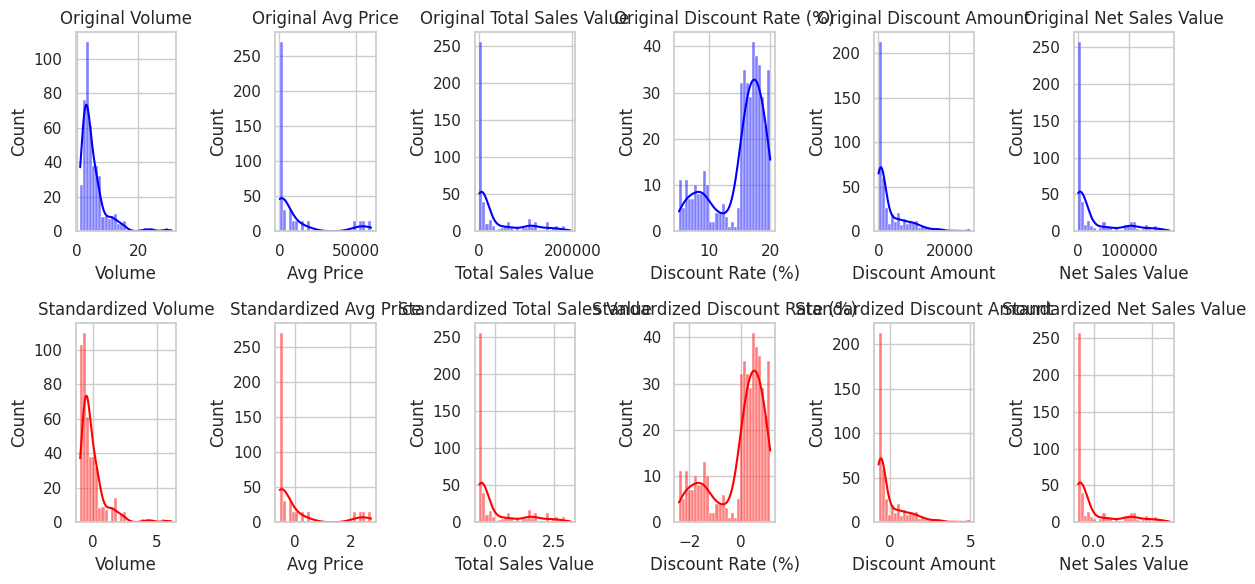

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "sales_data_with_discounts.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Compute mean and std before scaling
before_scaling = df[numerical_cols].describe().T[['mean', 'std']]

# Standardization using z-score normalization
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Compute mean and std after scaling
after_scaling = df_scaled[numerical_cols].describe().T[['mean', 'std']]

# Compare before and after scaling
comparison = pd.concat([before_scaling, after_scaling], axis=1)
comparison.columns = ['Mean Before', 'Std Before', 'Mean After', 'Std After']
print("Comparison of Before and After Standardization:")
print(comparison)

#  Histograms: Before and After Standardization
plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols), i + 1)
    sns.histplot(df[col], kde=True, bins=30, color="blue", alpha=0.5)
    plt.title(f"Original {col}")

    plt.subplot(2, len(numerical_cols), i + 1 + len(numerical_cols))
    sns.histplot(df_scaled[col], kde=True, bins=30, color="red", alpha=0.5)
    plt.title(f"Standardized {col}")

plt.tight_layout()
plt.show()


# **Conversion of Categorical Data into Dummy Variables**

●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.

●	Steps:
	Discuss the need for converting categorical data into dummy variables (one-hot encoding).
	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
	Display a portion of the transformed dataset.


In [ ]:
import pandas as pd

# Load the dataset
file_path = "sales_data_with_discounts.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print("Transformed Dataset (First 5 Rows):")
print(df_encoded.head())


Transformed Dataset (First 5 Rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_

##Conclusion
## Descriptive Analytics & Visualizations Insights:
**Statistical Measures:**

Mean, median, mode, and standard deviation provided insights into the central tendency and spread of numerical variables.
High standard deviation in some features indicated significant variability in sales and discounts.

**Histograms & Boxplots:**

Histograms revealed whether numerical variables were normally distributed or skewed.
Boxplots identified outliers in sales data, suggesting possible data anomalies or extreme discounting patterns.

**Bar Charts for Categorical Data:**

Helped visualize frequency distributions of categorical variables like product types or regions.
Showed which categories were most common, helping in customer segmentation or sales strategies.


#  Importance of Data Preprocessing in ML & Data Analysis

**1️**. Standardization (Z-score Normalization)

1) Ensures all numerical variables contribute equally to models.

2) Prevents features with large ranges from dominating learning algorithms.

3) Helps improve performance in distance-based models (e.g., KNN, SVM).


**2**. One-Hot Encoding (Categorical Transformation)

1) Converts categorical variables into a machine-readable format.

2) Prevents numerical misinterpretation (e.g., "Category A = 1" vs. "Category B = 2").

3) Improves model accuracy and fairness, especially in tree-based models and regressions.


Final Reflection:

 Effective data preprocessing is crucial for accurate and reliable machine learning models.
Without proper scaling and encoding, models may generate biased or misleading results.

